# Navigation

---

This notebook was used to train the agent

Run all sections up to and including section 5 if you wish to setup the agent.
If you want to train the agent run section 6.
Section 7 saves the trained weights
Section 8 Runs the trained agent

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
# Make all important imoprts and create agent

import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from agent import Agent


agent = Agent(state_size=37, action_size=4)

Episode 100	avg Score: 0.74
Episode 200	avg Score: 4.20
Episode 300	avg Score: 6.91
Episode 400	avg Score: 10.13
Episode 500	avg Score: 12.52
Episode 531vg Score: 13.00
Environment solved in 431 episodes!	Average Score: 13.00


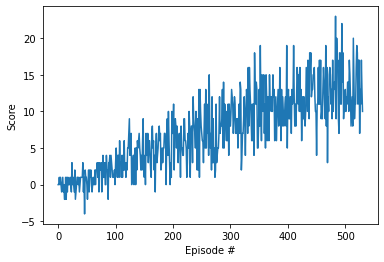

In [6]:
# define the learning algorithm and learn until the problem is solved or the max amount of actions is taken

def dqn(n_episodes=1800, max_action= 400, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_action (int): maximum number of actions per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []
    scores_window = deque(maxlen=100)
    
    #Set epsilon to the initial value for epsilon
    eps = eps_start
    
    
    for i_episode in range(1,n_episodes+1):
        
    
        #reset the environment for every episode and initialize the state
        step_brain_info = env.reset(train_mode=i_episode % 100 != 0)[brain_name] # reset the environment
        state = step_brain_info.vector_observations[0]   #obtain the starting state
        
        score = 0 #initialze the score for the episode
        
        
        
        for a in range(max_action):
            action = agent.act(state, eps) # the agent chooses an action
            
            step_brain_info = env.step(action)[brain_name]
            
            next_state = step_brain_info.vector_observations[0]   # get the next state
            reward = step_brain_info.rewards[0]                   # get the reward
            done = step_brain_info.local_done[0]                  # see if episode has finished
            score += reward      
            
            
            agent.step(state, action, reward, next_state, done)
            
            state = next_state                             # roll over the state to next time step
            if done:                     # exit loop if episode finished
                break
                
            if env.global_done:
                print('Global Done Steps: '+ str(a))
                break
                
        
        scores.append(score)
        scores_window.append(score)       # save most recent score
        
        # Epsilon decays up to eps_end 
        eps = max(eps_end, eps_decay*eps) 
        
        
        print('\rEpisode {}\tavg Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tavg Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
        
    
    return scores
        
scores =  dqn()
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show() 

In [8]:

#Save the weights
agent.save_weights()


In [13]:
### Run the agent with the learned Weights

agent.load_saved_weights()
eps = 0.1
score = 0
max_action= 400


#reset the environment for every episode and initialize the state
step_brain_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = step_brain_info.vector_observations[0]   #obtain the starting state


for a in range(max_action):
    action = agent.act(state, eps) # the agent chooses an action
    
    step_brain_info = env.step(action)[brain_name]
    
    next_state = step_brain_info.vector_observations[0]   # get the next state
    reward = step_brain_info.rewards[0]                   # get the reward
    done = step_brain_info.local_done[0]                  # see if episode has finished
    score += reward      
    
    
    agent.step(state, action, reward, next_state, done)
    
    state = next_state                             # roll over the state to next time step
    if done:                     # exit loop if episode finished
        break
        
    if env.global_done:
        print('Global Done Steps: '+ str(a))
        break


In [12]:
env.close()